# Pitchfork album reviews analysis

Simple statistical analysis conducted with Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn

seaborn.set()

data = pd.read_csv('cleaned_data.csv', encoding = "ISO-8859-1")

In [4]:
number_of_artist = len(data.artist.unique())
number_of_reviews = len(data)
print('--- GENERAL STATISTICS ---')
print(' Number of reviews: {}\n Unique artists: {}'.format(number_of_reviews, number_of_artist))

--- GENERAL STATISTICS ---
 Number of reviews: 18959
 Unique artists: 9290


As of June 25, 2017 18959 albums by 9290 artists (including albums by 'Various Artists' etc.) were reviewed.

In [15]:
q1 = data.score.quantile(0.25)
q2 = data.score.quantile(0.5)
q3 = data.score.quantile(0.75)
mean = data.score.mean()
maximum = data.score.max()
minimum = data.score.min()
# could be done with data.score.describe()num_z = len(data[data.score == 0.0])
num_t = len(data[data.score == 10])
print('--- SCORE STATISTICS ---')
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
print('\nNumber of albums rated 0.0: {}'.format(num_z))
print('Number of albums rated 10: {}'.format(num_t))
#print('\nTop scores:\n{}'.format(top_scores))

--- SCORE STATISTICS ---
 Quartile 1: 6.4
 Quartile 2 (median): 7.2
 Quartile 3: 7.8
 Mean: 7.02
 Min: 0.0
 Max: 10.0

Number of albums rated 0.0: 7
Number of albums rated 10: 85


The scale is from 0.0 to 10.0, incrementing minimum by 0.1.
Maximum score given was 10.0 (given to 85 albums), minimum score was 0.0 (given to 7 albums).

25% of reviewed albums were rated at 6.4 or lower.
25% of reviewed albums were rated at 7.8 or higher.
The median is equal to 7.2, which means that equal amount of albums earned score lower and higher than 7.2.
The average score given to an album is 7.02. 

A score histogram can be found below.

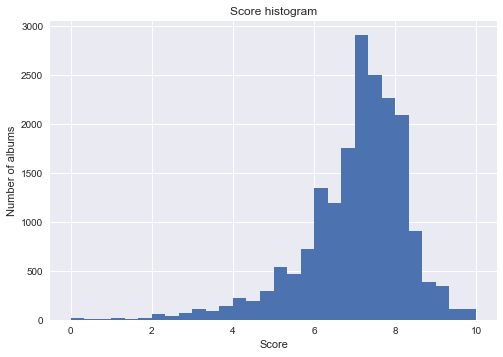

In [106]:
plt.hist(data.score, bins = 30)
plt.title('Score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

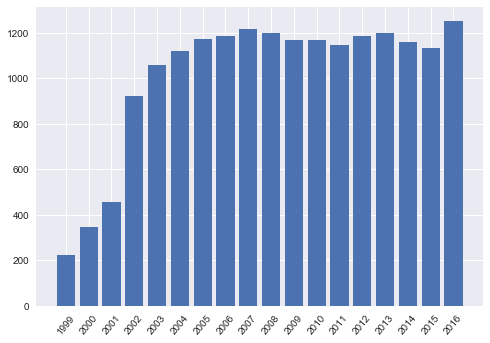

In [118]:
dict_r = dict(data.review_date_year.value_counts())
y = [dict_r[k] for k in range(1999, 2018)]
y.pop(-1)
x = [x for x in range(18)]
labels = [str(z) for z in range(1999, 2017)]
plt.xticks(range(len(y)), labels, rotation=50)
plt.bar(x,y)
plt.show()

In [120]:
d = []
for i in range(1, len(y)):
    d.append(abs(y[i] - y[i-1]))
d
sum(y)/len(y)

1018.1666666666666

Number of reviews was growing very rapidly between 1999 and 2003. The biggest year to year difference was between 2001 and 2002 (467 reviews more). 2017 is not included because it's only half over. The average number of reviews is 1018/year.

--- AUTHORS' STATISTICS ---
Number of authors: 431

Top authors (by number of reviews written):
Joe Tangari           814
Stephen M. Deusner    747
Ian Cohen             718
Mark Richardson       612
Brian Howe            502
Stuart Berman         467
Marc Hogan            443
Nate Patrin           356
Marc Masters          326
Jayson Greene         309
Name: review_author, dtype: int64



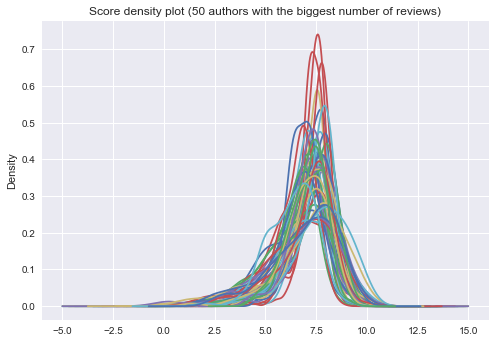

In [128]:
number_of_authors = len(data.review_author.unique())
top_authors_names = data.review_author.value_counts()[:10].keys()
top_authors_numbers = data.review_author.value_counts()[:10]
print('--- AUTHORS\' STATISTICS ---')
print('Number of authors: {}\n\nTop authors (by number of reviews written):\n{}\n'.format(number_of_authors, top_authors_numbers))

top_50_authors_names = data.review_author.value_counts()[:50].keys()

for author in top_50_authors_names:
    d = data[data.review_author == author]
    d.score.plot(kind = 'kde', label = author)
plt.title('Score density plot (50 authors with the biggest number of reviews)')
#plt.legend(loc = 'best')
plt.show()

Above a list of ten authors with the biggest number of reviews can be found. 431 unique authors published reviews (cooperations between two or more authors are also included as unique authors). 

As can be seen on the density plot, the score distribution vary for differend reviewers. Some of them much more often give album a score between 7.0 and 8.0. 

Below a series of score histograms for to 10 authors is attached.

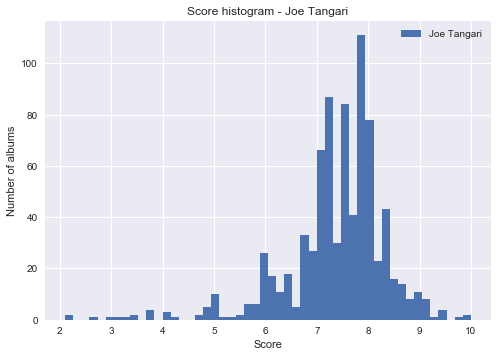

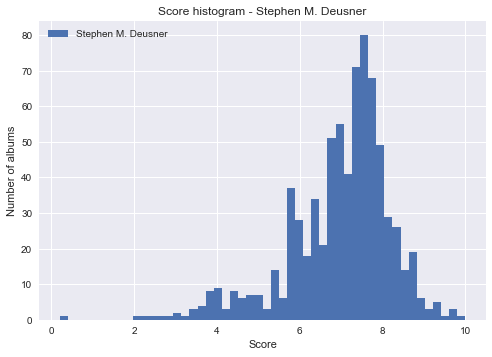

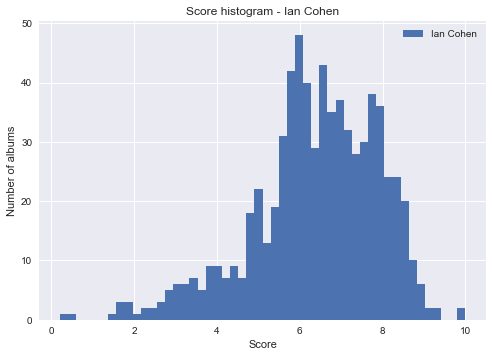

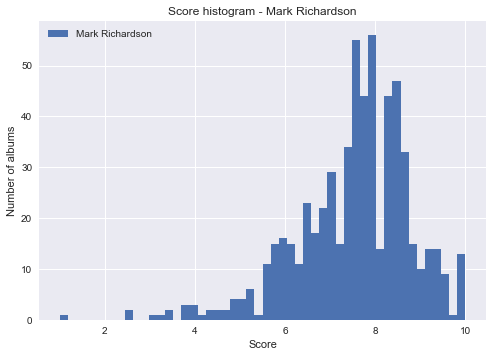

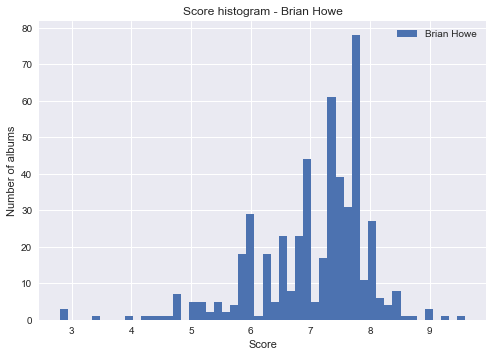

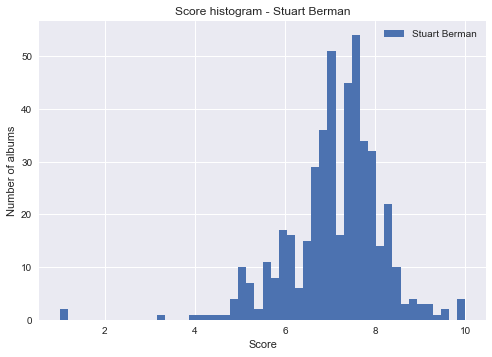

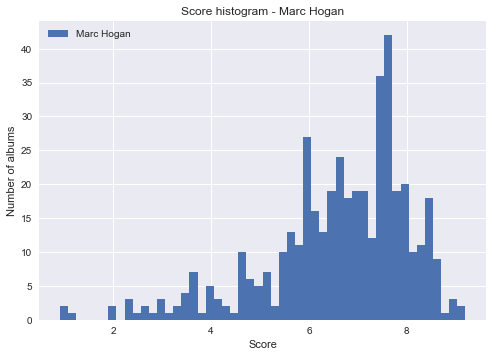

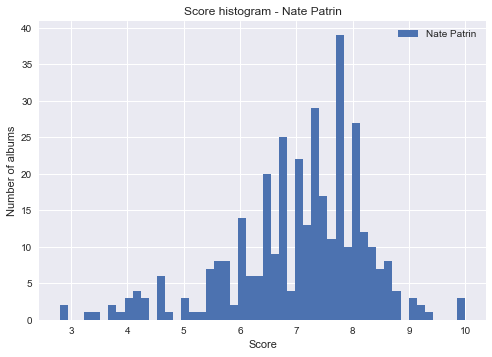

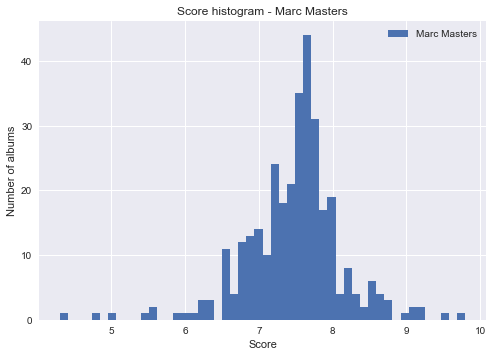

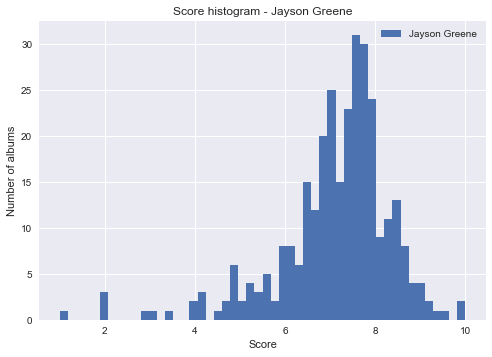

In [40]:
for author in top_authors_names:
    plt.figure()
    d = data[data.review_author == author]
    plt.hist(d.score, bins = 50, label = author)
    plt.title('Score histogram - {}'.format(author))
    plt.xlabel('Score')
    plt.ylabel('Number of albums')
    plt.legend(loc ='best')
    plt.show()

In [130]:
number_of_artists = len(data.artist.unique())
top_artists_names = data.artist.value_counts()[:10].keys() 
top_artists_numbers = data.artist.value_counts()[1:11] # excluding 'various artists' from the list
print('--- ARTISTS\' STATISTICS ---')
print('Number of artists: {}\ntop artists:\n{}\n'.format(number_of_artists, top_artists_numbers))

--- ARTISTS' STATISTICS ---
Number of artists: 9290
top artists:
Guided by Voices     24
Mogwai               20
The Beatles          20
Of Montreal          19
Animal Collective    19
David Bowie          18
Xiu Xiu              18
Neil Young           17
Bob Dylan            17
Robert Pollard       17
Name: artist, dtype: int64



A simple list of the most frequently reviewd artists. Top 10 does not include cooperations signed as 'Various Artists' which would be in the first place with 27 occurrences.

--- 'BEST NEW MUSIC' SCORE STATISTICS ---
Number of albums labeled as 'Best new music': 654
 Quartile 1: 8.4
 Quartile 2 (median): 8.5
 Quartile 3: 8.8
 Mean: 8.61
 Min: 7.9
 Max: 10.0


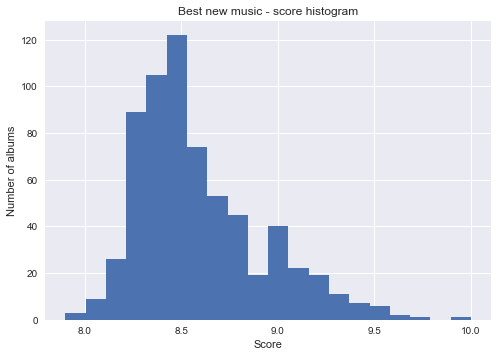

In [29]:
bnm = data[data.merit.str.contains('Best new music') == True]
number_of_bnm = len(bnm.score)
q1 = bnm.score.quantile(0.25)
q2 = bnm.score.quantile(0.5)
q3 = bnm.score.quantile(0.75)
mean = bnm.score.mean()
maximum = bnm.score.max()
minimum = bnm.score.min()
print('--- \'BEST NEW MUSIC\' SCORE STATISTICS ---')
print('Number of albums labeled as \'Best new music\': {}'.format(number_of_bnm))
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
plt.hist(bnm.score, bins = 20)
plt.title('Best new music - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

There is no clear rule about labeling album as 'Best new music' or 'Best new reissue' it's interesting to take a look at statistic for such albums. 

654 albums were labeled as 'Best new music'.

The mean score for those albums is 8.61 and the median is 8.5.
25% of BNM albums were given 8.4 or less and 25% were given 8.8 or higher. 

The lowest score for BNM was 7.9 and the highest was obviously 10.0. 

--- 'BEST NEW REISSUE' SCORE STATISTICS ---
Number of albums labeled as 'Best new reissue': 335
 Quartile 1: 8.5
 Quartile 2 (median): 8.7
 Quartile 3: 9.1
 Mean: 8.83
 Min: 5.2
 Max: 10.0


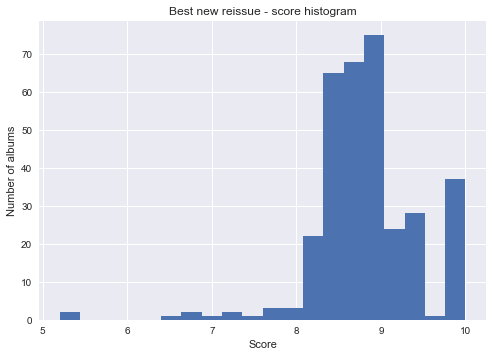

In [30]:
bnr = data[data.merit.str.contains('Best new reissue') == True]
number_of_bnr = len(bnr.score)
q1 = bnr.score.quantile(0.25)
q2 = bnr.score.quantile(0.5)
q3 = bnr.score.quantile(0.75)
mean = bnr.score.mean()
maximum = bnr.score.max()
minimum = bnr.score.min()
print('--- \'BEST NEW REISSUE\' SCORE STATISTICS ---')
print('Number of albums labeled as \'Best new reissue\': {}'.format(number_of_bnr))
print(' Quartile 1: {}\n Quartile 2 (median): {}\n Quartile 3: {}\n Mean: {}\n Min: {}\n Max: {}'.format(q1, q2, q3, mean.round(2), minimum, maximum))
plt.hist(bnr.score, bins = 20)
plt.title('Best new reissue - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.show()

335 albums were labeled as 'Best new reissue'.

The mean score for those albums is 8.83 and the median is 8.7.
25% of BNM albums were given 8.5 or less and 25% were given 9.1 or higher. 

The lowest score for BNM was 5.2, which is surprisingly low for an album distinguished as BNR.
The highest score was 10.0. 

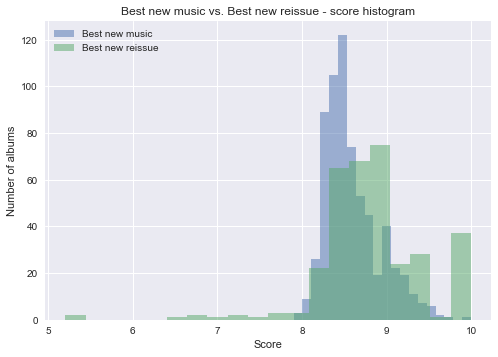

In [34]:
plt.hist(bnm.score, alpha = 0.5, label = 'Best new music', bins = 20)
plt.hist(bnr.score, alpha = 0.5, label = 'Best new reissue', bins = 20)
plt.title('Best new music vs. Best new reissue - score histogram')
plt.xlabel('Score')
plt.ylabel('Number of albums')
plt.legend(loc='upper left');
plt.show()

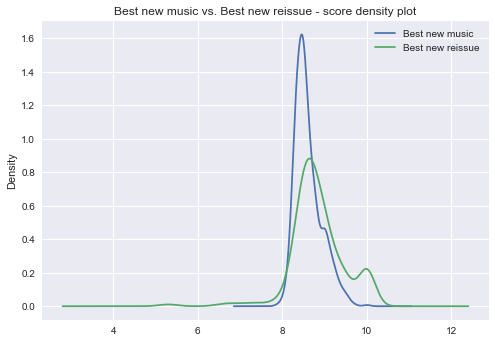

In [35]:
bnm.score.plot(kind='kde', label = 'Best new music')
bnr.score.plot(kind='kde', label = 'Best new reissue')
plt.title('Best new music vs. Best new reissue - score density plot')
plt.legend(loc='best')
plt.show()

What is interesting in the density plot is the difference regarding score equal 10.0. Reissues are much more likely to achive the highest score possible (probably due to the fact, that those reissues are in most cases rich reeditions of well received albums from well know bands).

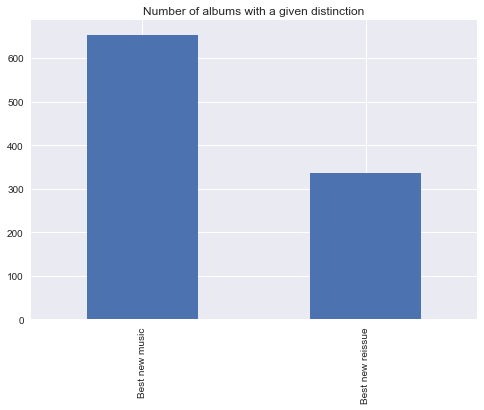

In [67]:
data.merit.value_counts().plot(kind = 'bar')
plt.title('Number of albums with a given distinction')
plt.show()

--- Number of albums reviewed (by genre) - top 10 ---

Rock                 6652
Electronic           2111
Rap                  1327
Electronic,Rock      1163
Pop/R&B               917
Experimental,Rock     883
Experimental          617
Folk/Country          579
Metal,Rock            362
Metal                 360
Name: genre, dtype: int64


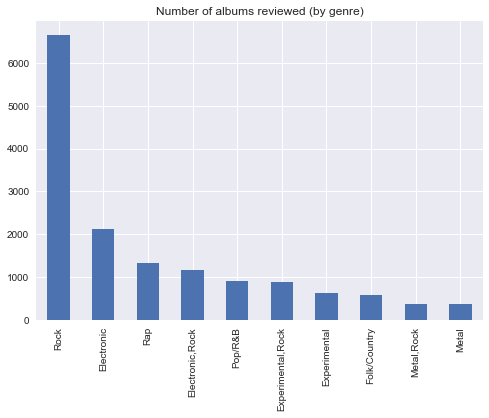

In [90]:
top_genres = data.genre.value_counts()[:10]
print('--- Number of albums reviewed (by genre) - top 10 ---\n')
print(top_genres)
top_genres.plot(kind = 'bar')
plt.title('Number of albums reviewed (by genre)')
plt.show()

Last but not least - top ten genres among reviewed albums. Rock dominance is clearly overwhelming. 